In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#load the dataset
df = pd.read_csv('/content/Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

Visulaization of the dataset

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


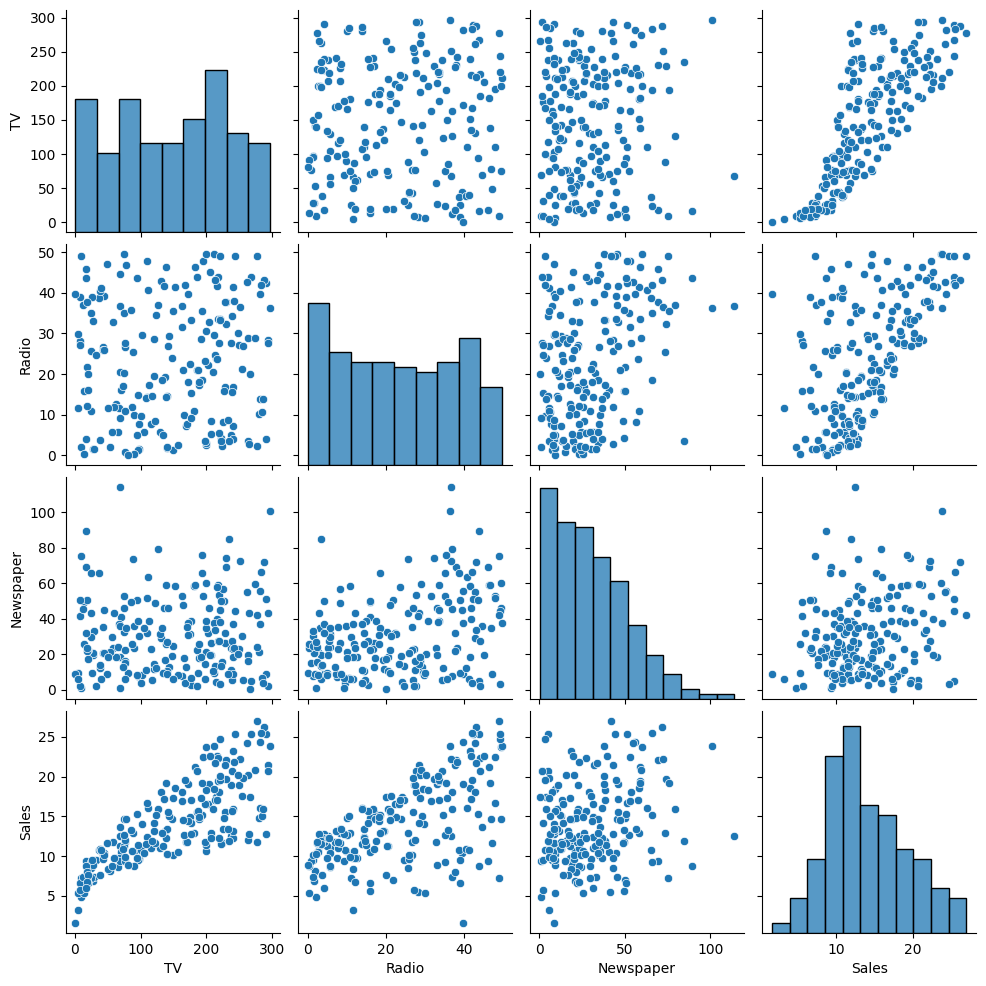

In [10]:
sns.pairplot(df)

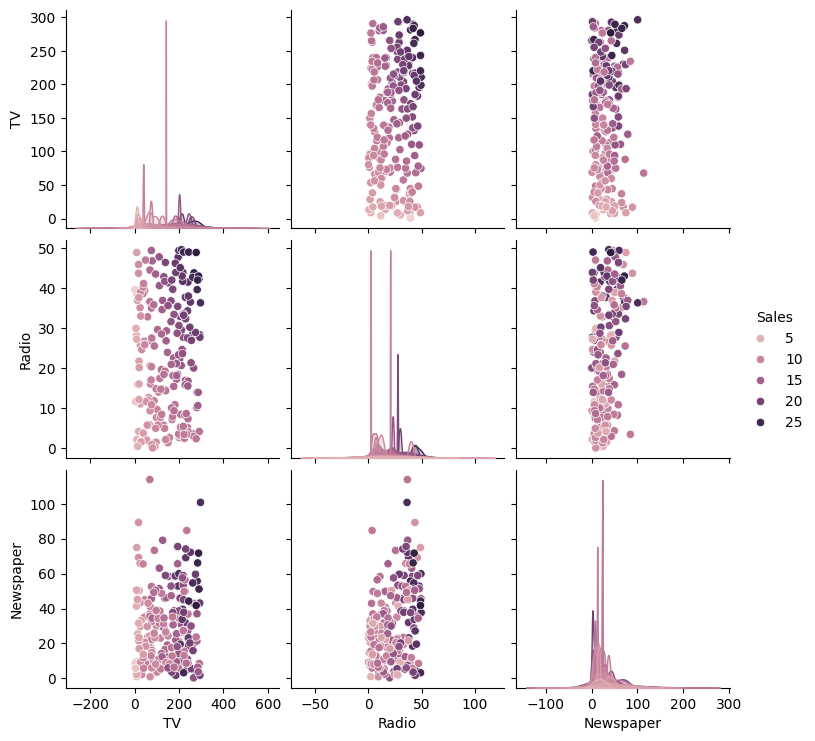

In [11]:
sns.pairplot(df, hue='Sales')

separating input and output columns

In [15]:
data = df.values
X = data[:,0:3]
Y = data[:,3]
print(X)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

splitting the data into training and testing

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Model 1 : Support vector machine

In [19]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train, Y_train)

SVR()

In [23]:
prediction1 = model_svr.predict(X_test)
# calculate the accuracy using appropriate metrics for regression
from sklearn.metrics import r2_score, mean_squared_error

# R-squared score
r2 = r2_score(Y_test, prediction1)
print(f"R-squared: {r2}")

# Mean Squared Error
mse = mean_squared_error(Y_test, prediction1)
print(f"Mean Squared Error: {mse}")

R-squared: 0.824037956495632
Mean Squared Error: 3.5412845150873693


Model 2: Linear regression

In [24]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

LinearRegression()

In [28]:
prediction2 = model_lr.predict(X_test)
# calculate the accuracy using appropriate metrics for regression
from sklearn.metrics import r2_score, mean_squared_error

# R-squared score
r2 = r2_score(Y_test, prediction2)
print(f"R-squared: {r2}")

# Mean Squared Error
mse = mean_squared_error(Y_test, prediction2)
print(f"Mean Squared Error: {mse}")

R-squared: 0.7653339117077164
Mean Squared Error: 4.722719560056489


Model 3: Decision tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, Y_train)

DecisionTreeRegressor()

In [32]:
prediction3 = model_DT.predict(X_test)
# calculate the accuracy using appropriate metrics for regression
from sklearn.metrics import r2_score, mean_squared_error

# R-squared score
r2 = r2_score(Y_test, prediction3)
print(f"R-squared: {r2}")

# Mean Squared Error
mse = mean_squared_error(Y_test, prediction3)
print(f"Mean Squared Error: {mse}")

R-squared: 0.9274171408837891
Mean Squared Error: 1.46075


In [39]:
X_new = np.array([[230.1, 37.8, 69.2]])
prediction = model_DT.predict(X_new)
print("Prediction: {}".format(prediction))

Prediction: [22.1]


In [40]:
X_new = np.array([[230.1, 37.8, 69.2]])
prediction = model_lr.predict(X_new)
print("Prediction: {}".format(prediction))

Prediction: [20.63660999]


In [41]:
X_new = np.array([[230.1, 37.8, 69.2]])
prediction = model_svr.predict(X_new)
print("Prediction: {}".format(prediction))

Prediction: [20.20214025]
